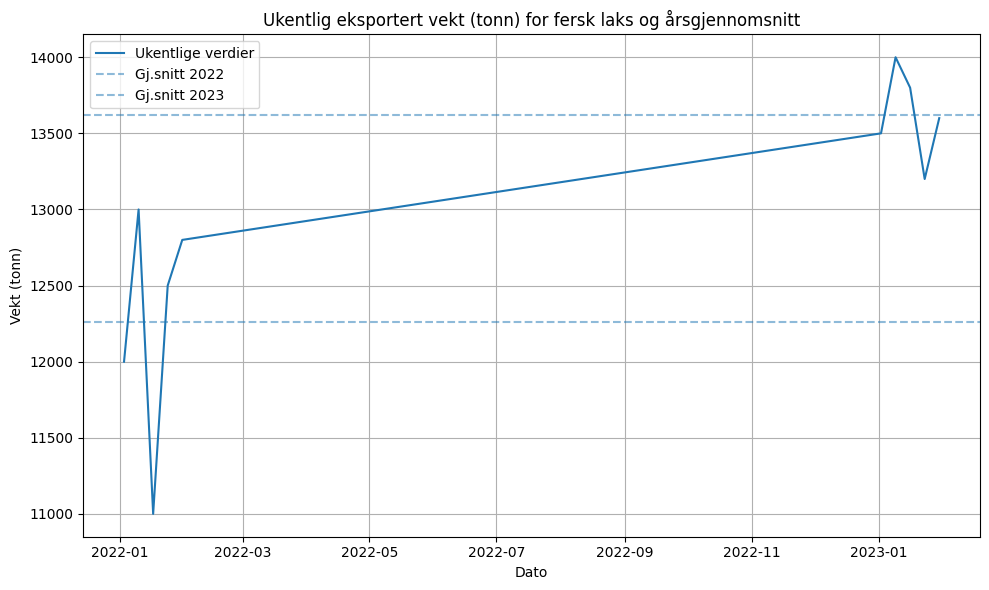

In [1]:
"""
    Plotter gjennomsnitt av ferks laks sin vekt i tonn vs vanlige originale verdier for fersk laks i tonn 
    Dette er viktig fordi det viser hvor ustabil eksportvolumet er per uke 
    Man kan se hvordan dataen per uke varierer i forhold til gjennomsnittet 
    sesongmønster og topper blir mer synlig

"""



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Simulerer df_pivot og df_stat_år for demonstrasjon
data = {
    "År": [2022]*5 + [2023]*5,
    "Uke": list(range(1, 6))*2,
    "UkeDato": pd.date_range(start="2022-01-03", periods=5, freq="W-MON").tolist() +
               pd.date_range(start="2023-01-02", periods=5, freq="W-MON").tolist(),
    "Fersk laks - Vekt (tonn)": [12000, 13000, 11000, 12500, 12800, 13500, 14000, 13800, 13200, 13600]
}
df_pivot = pd.DataFrame(data)

# Lag df_stat_år basert på df_pivot
statistikk_per_år = []
for år in sorted(df_pivot["År"].unique()):
    df_år = df_pivot[df_pivot["År"] == år]
    kol = "Fersk laks - Vekt (tonn)"
    verdier = df_år[kol].dropna()
    statistikk_per_år.append({
        "År": år,
        "Variabel": kol,
        "Gjennomsnitt": round(np.mean(verdier), 2),
        "Median": round(np.median(verdier), 2),
        "Standardavvik": round(np.std(verdier), 2)
    })

df_stat_år = pd.DataFrame(statistikk_per_år)

# Plot originale verdier og gjennomsnitt per år
plt.figure(figsize=(10, 6))

# Originale ukentlige verdier
sns.lineplot(data=df_pivot, x="UkeDato", y="Fersk laks - Vekt (tonn)", label="Ukentlige verdier")

# Gjennomsnitt per år lagt som horisontale linjer
for _, row in df_stat_år.iterrows():
    plt.axhline(y=row["Gjennomsnitt"], linestyle="--", alpha=0.5, label=f"Gj.snitt {int(row['År'])}")

plt.title("Ukentlig eksportert vekt (tonn) for fersk laks og årsgjennomsnitt")
plt.xlabel("Dato")
plt.ylabel("Vekt (tonn)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



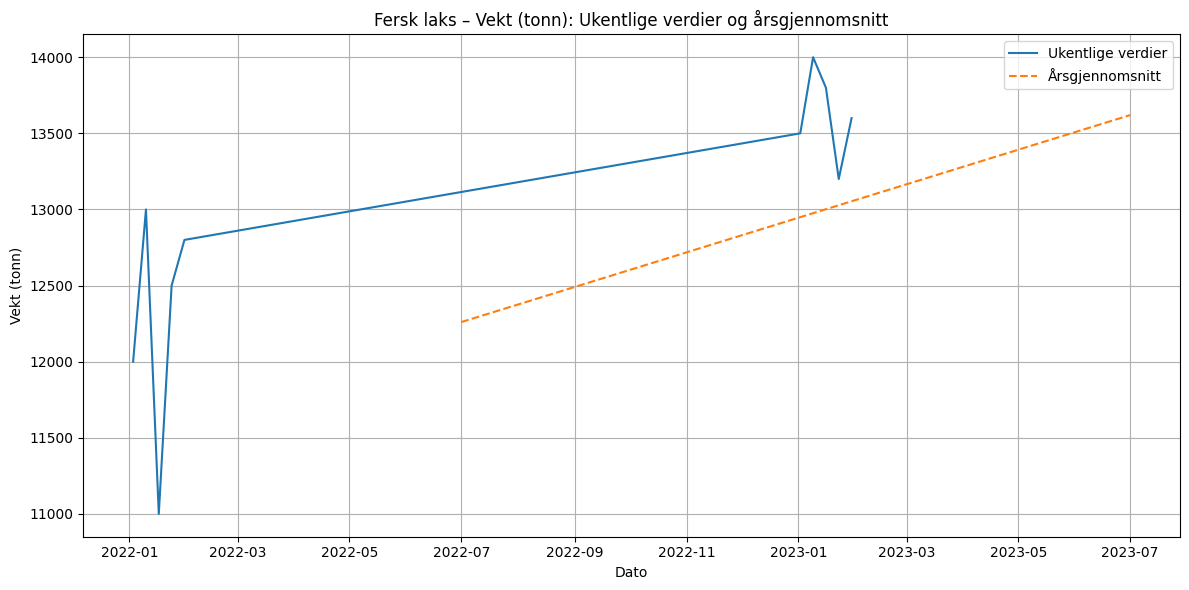

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Originale ukentlige verdier
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_pivot, x="UkeDato", y="Fersk laks - Vekt (tonn)", label="Ukentlige verdier")

# 2. Gjennomsnitt per år
df_gjennomsnitt = df_pivot.groupby("År")["Fersk laks - Vekt (tonn)"].mean().reset_index()
df_gjennomsnitt["Dato"] = pd.to_datetime(df_gjennomsnitt["År"].astype(str) + "-07-01")

sns.lineplot(data=df_gjennomsnitt, x="Dato", y="Fersk laks - Vekt (tonn)", label="Årsgjennomsnitt", linestyle="--")

# Stil og layout
plt.title("Fersk laks – Vekt (tonn): Ukentlige verdier og årsgjennomsnitt")
plt.xlabel("Dato")
plt.ylabel("Vekt (tonn)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

if df_pivot is not None:
    # Beregn årsgjennomsnitt
    df_gj = df_pivot.groupby("År")["Fersk laks - Vekt (tonn)"].mean().reset_index()

    # Lag plott
    plt.figure(figsize=(12, 6))

    # Ukentlige verdier
    plt.plot(df_pivot["UkeDato"], df_pivot["Fersk laks - Vekt (tonn)"],
             label="Ukentlig vekt", linewidth=1)

    # Årsgjennomsnitt (bruk 1. juli som dato for jevn spredning)
    df_gj["Dato"] = pd.to_datetime(df_gj["År"].astype(str) + "-07-01")
    plt.plot(df_gj["Dato"], df_gj["Fersk laks - Vekt (tonn)"],
             label="Årsgjennomsnitt", linestyle="--", marker="o")

    # Stil
    plt.title("Fersk laks – Vekt (tonn): Ukentlige verdier og årsgjennomsnitt")
    plt.xlabel("Dato")
    plt.ylabel("Vekt (tonn)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

df_plot = df_pivot.groupby("År")["Fersk laks - Kilospris"].agg(["mean", "std", "median"])
df_plot.plot(title="Utvikling i statistiske mål for fersk laks (kilospris)")
plt.ylabel("Pris (kr)")
plt.xlabel("År")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

if df_pivot is not None:
    # --- 1. Gjennomsnitt per år for "Fersk laks - Vekt (tonn)" ---
    df_plot = df_pivot.groupby("År")["Fersk laks - Vekt (tonn)"].mean().reset_index()

    plt.figure(figsize=(10, 6))
    plt.plot(df_plot["År"], df_plot["Fersk laks - Vekt (tonn)"], label="Gjennomsnitt", marker="o")
    plt.title("Gjennomsnitt per år – Fersk laks: Vekt (tonn)")
    plt.xlabel("År")
    plt.ylabel("Vekt (tonn)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- 2. Originale ukentlige verdier for "Fersk laks - Vekt (tonn)" ---
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_pivot, x="År", y="Fersk laks - Vekt (tonn)", label="Ukentlig vekt")
    plt.title("Ukentlig eksportert vekt av fersk laks")
    plt.xlabel("Dato")
    plt.ylabel("Vekt (tonn)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()